In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout

In [2]:
df = pd.read_csv("Dataset.csv")
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
X = df['Message'].values
y = pd.get_dummies(df['Category']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
max_words = 5000
max_len = 50
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [4]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(units=64, input_shape=(max_len, 128))) 
model.add(Dense(units=2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8423 - loss: 0.4029 - val_accuracy: 0.9671 - val_loss: 0.1344
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9852 - loss: 0.0727 - val_accuracy: 0.9821 - val_loss: 0.0657
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9938 - loss: 0.0349 - val_accuracy: 0.9827 - val_loss: 0.0686
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9971 - loss: 0.0196 - val_accuracy: 0.9833 - val_loss: 0.0611
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9975 - loss: 0.0172 - val_accuracy: 0.9844 - val_loss: 0.0599


In [6]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9834 - loss: 0.0663
Test Loss: 0.06103914603590965
Test Accuracy: 0.9844497442245483


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


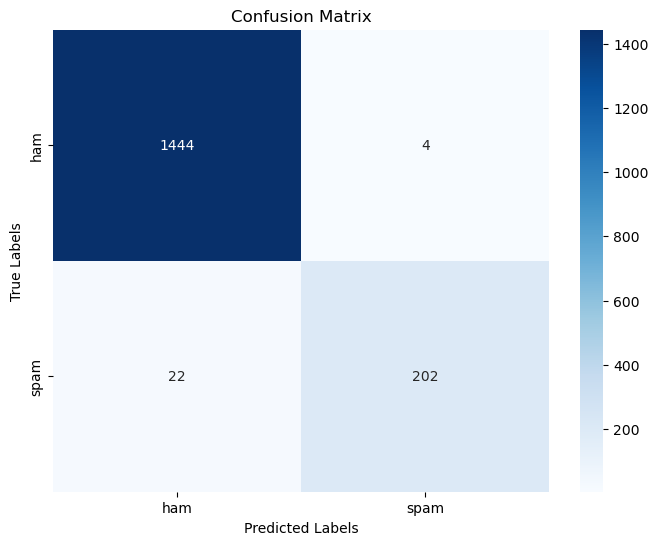

In [12]:
# Predictions
y_pred = model.predict(X_test_pad)

# Convert predictions to binary format
binary_predictions = np.round(y_pred).argmax(axis=1)

# Flatten the one-hot encoded true labels
true_labels = y_test.argmax(axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()